## Antenna Array

### Two element array

In this case we take two infinitesimal dipoles 

$$E_{t} = E_1 + E_2 = \hat{\theta} j\eta \frac{kI_0 l}{4\pi} \left[\frac{e^{-jk[r_1-\beta/2)]}}{r_1} \cos(\theta_{1} + \frac{e^{-jk[r_2+\beta/2)]}}{r_1} \cos(\theta_{2}  \right] $$

<center>
<img src="images/antenna_array/two_element_array.png" style="height: 300px; width:300px;">
</center>

If the point source is far away then we can assume that for the amplitude terms $r_1 \sim r_2 \sim r$ and $\theta_1 \sim \theta_2 \sim \theta$, but the phase is other story.. For the phase terms we consider $r_1 \sim r-d/2\cos(\theta)$ and $r_2 \sim r+d/2\cos(\theta)$. With that we obtain:

$$ E_t = \hat{\theta} j\eta \frac{kI_0 l}{4\pi} \cos(\theta) \left[2\cos\left( \frac{1}{2}(kd\cos(\theta)+\beta) \right) \right] $$

This expression show that the final beam pattern will be a multiplication of the single element pattern with a geometrical factor. This geometrical factor y the array factor. The array factor depends on the distance between the elements $d$ and the relative phase that is between the elements $\beta$.

In the most general approach the array factor depends on the number of elements, the geoemtry, the magnitudes and the phase of each element and the spacing between elements.


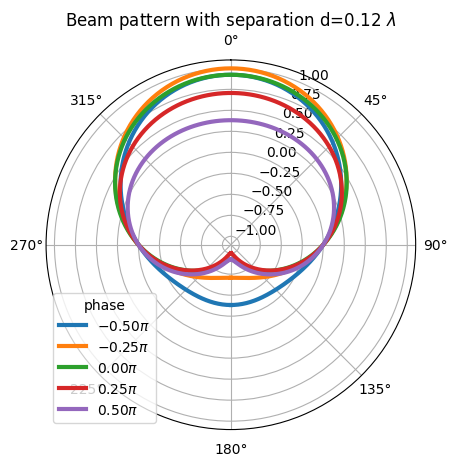

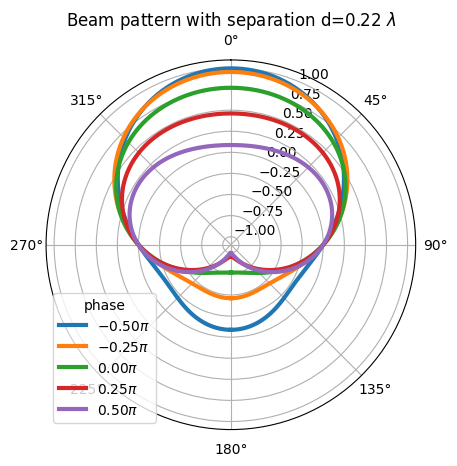

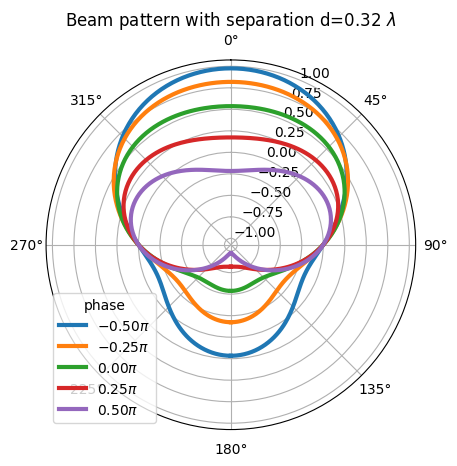

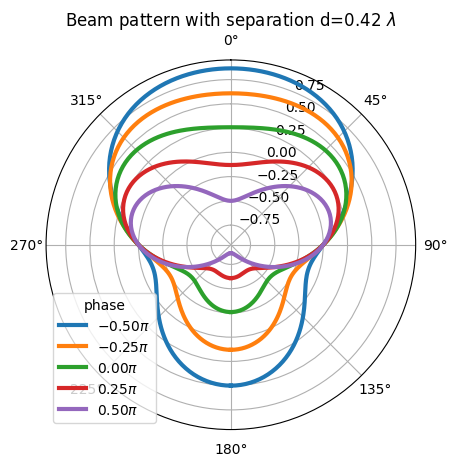

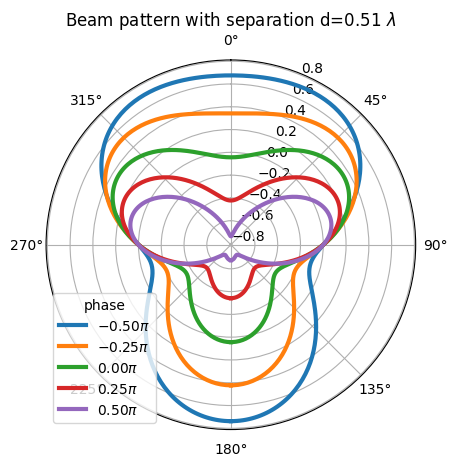

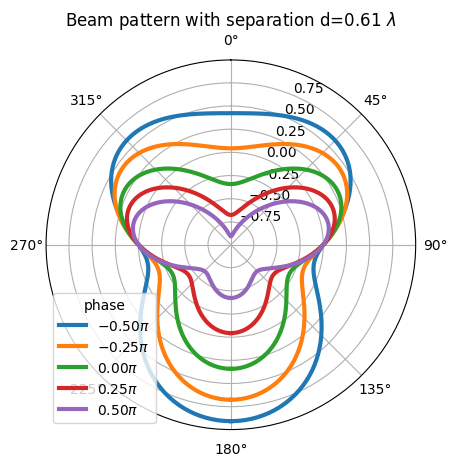

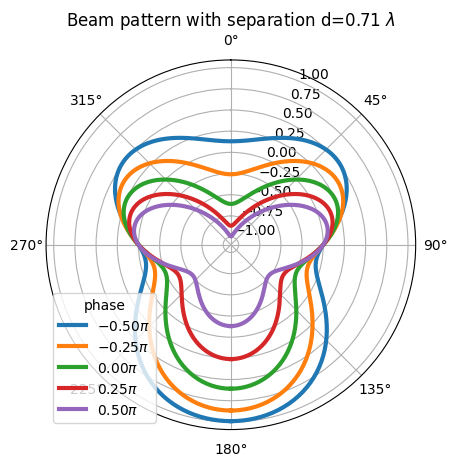

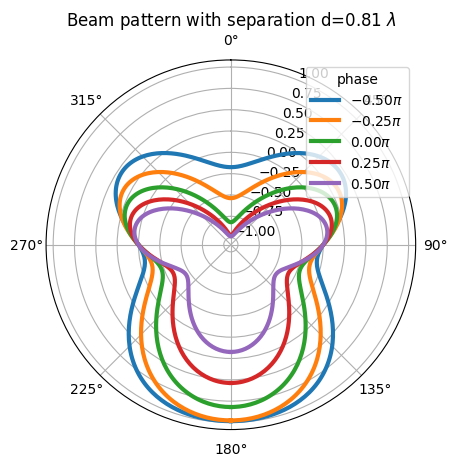

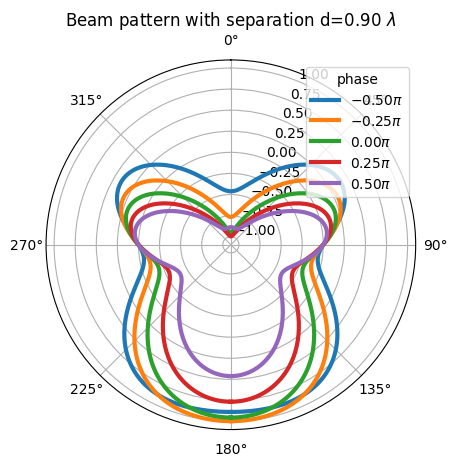

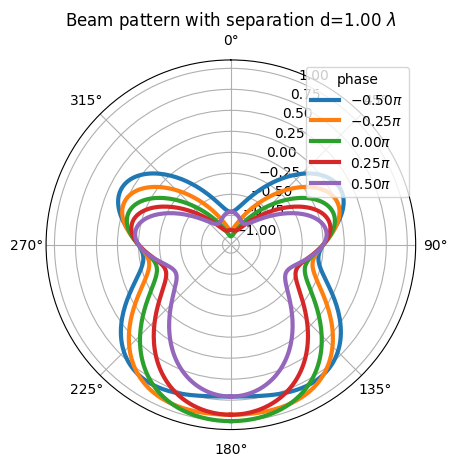

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as cte 

def array_factor_2dipoles(theta,d, beta, freq):
    alambda = cte.c.value/freq
    k = 2*np.pi/alambda
    output = np.cos(theta)*np.cos(1/2*(k*d*np.cos(theta)+beta))
    return output


freq = 1*1e9
alambda = cte.c.value/freq
theta = np.linspace(-np.pi, np.pi, 361)
beta_test = np.linspace(-np.pi/2, np.pi/2, 5)
distance = np.linspace(0.125, 1, 10)*alambda

for d in distance:
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    for beta in beta_test:
        af = array_factor_2dipoles(theta,d, beta, freq)
        ax.plot(theta, af, lw=3, label="$%.2f \pi$"%(beta/np.pi))
    plt.title("Beam pattern with separation d=%.2f $\lambda$"%(d/alambda))
    plt.legend(title="phase")
    plt.show()



    

## N element linear array with uniform amplitud and spacing

In this case we have N elements that have a progressive relative phasse of $\beta$

$$ AF = \sum_{n=0}^{N-1} e^{jn(kd\cos(\theta)+\beta)} = \sum e^{jn\psi} $$

With $\psi=kd\cos(\theta)+\beta)$.

The trick here is to found that the expression is a geometric sum.. so it can be write the normalized array factor as:
$$ AF = \frac{1}{N}\frac{\sin(N/2 \cdot \psi)}{\sin(\psi/2)} \approx \frac{1}{N}\frac{\sin(N/2 \cdot \psi)}{\psi/2} $$

To found the null we check where is zero... I wont copy the algebra bu the result is:
$$\theta_n = \cos^{-1} \left( \frac{\lambda}{2\pi d} \left[-\beta \pm \frac{2n}{N} \pi \right] \right) $$  

Where $ n \in 1,2,3,\dots$ but less than $N$

The maximum is at:
$$ \theta_m = \cos^{-1} \left(\frac{\lambda \beta}{2\pi d} \right)$$

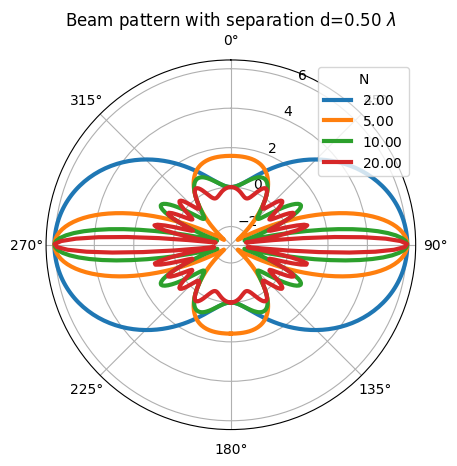

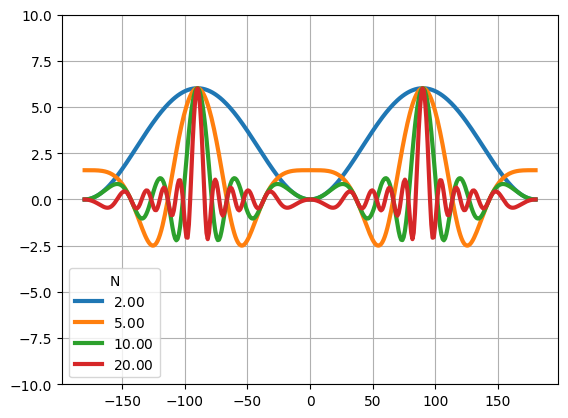

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as cte 

def uniform_array_factor1d(theta, N, d, beta, freq,):
    alambda = cte.c.value/freq
    k = 2*np.pi/alambda
    psi = k*d*np.cos(theta)+beta
    af = np.sin(N/2*psi)/(N*np.sin(psi/2))
    return af

freq = 1*1e9
alambda = cte.c.value/freq
theta = np.linspace(-np.pi, np.pi, 360)
beta = 0
d = alambda/2
number = [2,5,10,20]

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


for N in number:
    af = uniform_array_factor1d(theta,N,d, beta, freq)
    ax.plot(theta, 20*np.log10(af+1), lw=3, label="$%.2f $"%(N))
    
plt.title("Beam pattern with separation d=%.2f $\lambda$"%(d/alambda))
plt.legend(title="N")

plt.figure()
for N in number:
    af = uniform_array_factor1d(theta,N,d, beta, freq)
    plt.plot(np.rad2deg(theta), 20*np.log10(af+1), lw=3, label="$%.2f $"%(N))
plt.ylim(-10,10)
plt.grid()
plt.legend(title='N')    


/tmp/ipykernel_13374/3189877752.py:34: RuntimeWarning: divide by zero encountered in log10
  line.set_data(theta, 10*np.log10(af+1))
/tmp/ipykernel_13374/3189877752.py:12: RuntimeWarning: invalid value encountered in divide
  af = np.sin(N/2*psi)/(N*np.sin(psi/2))


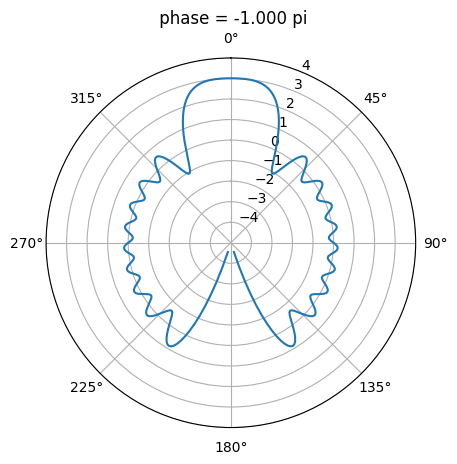

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


def uniform_array_factor1d(theta, N, d, beta, freq,):
    alambda = cte.c.value/freq
    k = 2*np.pi/alambda
    psi = k*d*np.cos(theta)+beta
    af = np.sin(N/2*psi)/(N*np.sin(psi/2))
    return af

freq = 1*1e9
alambda = cte.c.value/freq
theta = np.linspace(-np.pi, np.pi, 360)
d = alambda/2
number = 8
beta = np.linspace(-np.pi, np.pi, 256)

fig = plt.figure()
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
line, = ax.plot([],[])
txt_title = ax.set_title('')

ax.set_rlim(-5,4)

def uniform_array1d_scan_animation(i):
    phase = beta[i%len(beta)]
    af = uniform_array_factor1d(theta,N,d, phase, freq)
    line.set_data(theta, 10*np.log10(af+1))
    txt = " phase = %.3f pi"%(phase/np.pi)
    txt_title.set_text(txt)
    return line
    

anim = FuncAnimation(fig, uniform_array1d_scan_animation, frames=len(beta))

HTML(anim.to_html5_video())

## Broadside array

This is an array that points at $\theta=90$. The first maxima occurs when $\psi = 0$, so we need to force

$$ \psi = kd\cos(\theta)+\beta |_{\theta=90} = 0 \rightarrow \beta = 0$$

To point in $90$ the phase between the elements should be equal, also the previous math assumptions took a constant amplitude. The separation could be any number.

## End fire array
This array points at $\theta = 0$ or $\theta=180$. For $\theta=0$ you need $\beta=-kd$, for $\theta=180$ you need $\beta=kd$.
If the separation between elements is $d=\lambda/2$ then the radiation in 0 and 180 occurs simultaneously.
When having $d=n\lambda$ there exist four maximas two at 90,270 and two at 0,180.

## N element array: along z axis

Here he just rewrite a more general formula for the array factor
$$AF = \sum_{n=0}^{N-1} a_n e^{jn(kd\cos(\delta)+\beta)} $$

Where the novelty is that now we consider different amplitudes $a_n$ and the term $\delta$ is obtained by the projection of the source into the line where our array is placed.
$\cos(\delta) =\hat{z}\cdot \hat{r} = \cos(\theta)$. But if our array its placed in the $\hat{x}$ then $\cos(\delta) = \sin(\theta)\cos(\phi)$

## Uniform spacing, non uniform amplitude
Here he talks about uniform, binomial and Dolph-Tschebyscheff (this is another way to write Chebyshev....) arrays.
In terms of HPBW we have that uniform < Dolph < binomial. In contrast if we look at sidelobe level we have binomial < Dolph < uniform.
For a given sidelobe level the Dolph produces the smalles beamwidth between the nulls.
For binomials with $d \leq \lambda/2$ there are not sidelobes.

### Array factor again..
Now we consider even number of elements $2M$ and we suppouse that the amplitudes are symmetric around the origin.
$$ AF_{2M} = a_1e^{kd\cos(\theta)/2}+a_2e^{kd\cos(\theta)3/2}+\dots a_m e^{kd\cos(\theta)(2M-1)/2}+a_1^{kd\cos(\theta)/2}\dots +a_m e^{kd\cos(\theta)(2M-1)/2}$$
$$ AF_{2M} = 2\sum_{n=0}^{M-1}a_{n}\cos\left(\frac{2n+1}{2} kd\cos(\theta) \right) $$

In the binomial array the amplituedes are given by the pascal triangle. So for example if we have 4 elements we have the following terms: 1 3 3 1 that are the exitations of the array.

In practice the huge gap between the elements made the binomial array not desirable.

For the Dolph-Tschebyscheff take the Chebyshev polynomils as the coefficients for the amplitudes... the computation of the coefficients now also depends on the spacing of the elements, I found it a little bit messy so I just skip it.



## Planar array

<center>
<img src="images/antenna_array/planar_array.png" style="height: 300px; width:300px;">
</center>

If we have a single array placed in the X axis the array factor its:
$$ AF = \sum_{m=0}^{M-1} I_{m1} e^{jm(kd_x \sin(\theta)\cos(\phi)+\beta_x)} $$

Now if you have N of such arrays are placed next to each other in the y-direction with a distance $d_y$ and progressive phase change of $\beta_y$ 

$$ AF = \sum_{n=0}^{N-1} I_{1n} \left[ \sum_{0}^{M-1} I_{m1} e^{jm(kd_x \sin(\theta)\cos(\phi)+\beta_x)} \right]e^{jm(kd_y \sin(\theta)\sin(\phi)+\beta_y)} $$

If we have constant excitation $I_{mn} = I_0$ then we can write the array factor as

$$AF =  I_0 \sum_{m=0}^{M-1} e^{jm(kd_x \sin(\theta)\cos(\phi)+\beta_x)} \sum_{n=0}^{N-1} e^{jm(kd_y \sin(\theta)\sin(\phi)+\beta_y)}$$

$$ AF(\theta, \phi) = \left[\frac{\sin(M/2\cdot \Psi_x)}{M\sin(\Psi_x/2)}  \right]  \left[\frac{\sin(M/2\cdot \Psi_y)}{M\sin(\Psi_y/2)}  \right] $$

With $\Psi_x = kd_x\sin(\theta)\cos(\phi)+\beta_x$ and $\Psi_y = kd_y \sin(\theta)\sin(\phi)+\beta_y$

## Scann
If we want to observe in the $(\theta_0, \phi_0)$ direction then the phases should hold $\beta_x = -kd_x \sin(\theta_0)\cos(\phi)$ and $\beta_y = -kd_y \sin(\theta)\sin(\phi)$.



## Circular Array
<center>
<img src="images/antenna_array/circular_array.png" style="height: 300px; width:300px;">
</center>

Now we could write the field of the array as:
$$ E(r,\theta, \phi) = \sum_{n=0}^{N-1} a_n \frac{e^{-jkR_n}}{R_n} $$

Where $R_n$ is the distance of the n-element to the observation point. $R_n = \sqrt{(r^{2}+a^2-2ar\cos(\psi)}$

If $r>>a$ then $R_n \approx r-a\cos(\psi_n) = r-a\sin(\theta)\cos(\phi-\phi_n)$ Where $\phi_n = 2\pi(n/N)$

$$E(r,\theta, \phi) = \frac{e^{jkr}}{r} \sum_{n=0}^{N-1} a_n e^{jka\sin(\theta)\cos(\phi-\phi_n)}  = \frac{e^{jkr}}{r} AF$$

If we take the exitation $a_n = I_ne^{j\alpha_n}$ we could write:

$$AF = \sum_{n=0}^{N-1} I_n e^{j(ka\sin(\theta)\cos(\phi-\phi_n)+\alpha_n)} $$

The peak of the beam can be placed in $(\theta_0, \phi_0)$, setting $\alpha_n = -ka\sin(\theta_0)\cos(\phi_0-\phi_n)$ 



## Rule of thumbs

1. In an uniform array the maxima occurs when $\psi=0$.
2. To avoid grating lobes the seperation between elements should not be equal to multiples of the wavelength when $\beta=0$
3. To have only one end-fire maxima and avoid grating lobes $d<\lambda/2$.
4. To point in a given angle $\theta_0$ in a uniform array the phase should be $\beta=-kd\cos(\theta_0)$
5. For a broad side array the directivity can be approximated by $D_0 = 2N(d/\lambda)$
6. For a uniform array the side lobe level is around -13.5dB
7. When having a planar array if the spacing between elements is equal or greater than $\lambda/2$ then multiple maxima with equal magnitude can be formed.
8. An intutive way to understand the grating lobe formation is that when the distance of the elements is large enough to permit in-phase adition of the signal you could get this lobes. Thats why we keep seeing the $\lambda/2$ requierement.